In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
from IPython.display import display

In [7]:
# 🔐 Verbindung zur Datenbank
DB_PARAMS = {
    'user': 'postgres',
    'password': 'Datacraft', #<----ggf anpassen
    'host': 'localhost',
    'port': 5432,
    'database': 'redezeit'
}

# Verbindung-URL erstellen
url = URL.create(
    drivername="postgresql+psycopg2",
    username=DB_PARAMS['user'],
    password=DB_PARAMS['password'],
    host=DB_PARAMS['host'],
    port=DB_PARAMS['port'],
    database=DB_PARAMS['database']
)

# Engine erstellen
engine = create_engine(url)

In [48]:
query = """
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'public'
"""
tables_df = pd.read_sql(query, engine)
tables_df

,table_name
0,landingpage
1,datum_index
2,user_behaviors
3,what_did_user_do
4,where_did_they_come_from
5,what_devices_used
6,where_new_visitors_come_from
7,who_was_visiting


In [50]:
for table_name in tables_df['table_name']:
    print(f"\n.describe für Tabelle: {table_name}")
    print("=" * 70)
    try:
        df = pd.read_sql(f'SELECT * FROM "{table_name}"', engine)
        display(df.describe(include='all'))
    except Exception as e:
        print(f"⚠️ Fehler bei Tabelle '{table_name}': {e}")



.describe für Tabelle: landingpage


,datum,eid,seitentitel,aufrufe
count,16634,16634.000000,16634,16634.000000
unique,902,NaN,343,NaN
top,2024-07-16,NaN,Ich brauche Redezeit. | REDEZEIT FÜR DICH #vir...,NaN
freq,40,NaN,799,NaN
mean,NaN,10.493387,NaN,7.210833
std,NaN,6.382296,NaN,18.919588
min,NaN,1.000000,NaN,0.000000
25%,NaN,5.000000,NaN,1.000000
50%,NaN,10.000000,NaN,2.000000
75%,NaN,15.000000,NaN,6.000000



.describe für Tabelle: datum_index


,datum
count,903
unique,903
top,2025-06-21
freq,1



.describe für Tabelle: user_behaviors


,datum,seitenaufrufe,nutzer_insgesamt,durchschn._zeit_auf_der_seite,zeit_in_sekunden,seiten_/_sitzung,absprungrate_in_prozent
count,894,894.000000,894.000000,894,894.000000,894.000000,894.000000
unique,894,NaN,NaN,151,NaN,NaN,NaN
top,2025-06-12,NaN,NaN,00:01:30,NaN,NaN,NaN
freq,1,NaN,NaN,21,NaN,NaN,NaN
mean,NaN,134.738255,60.185682,NaN,99.390380,2.309843,25.201096
std,NaN,98.754918,27.526983,NaN,33.371216,3.029747,14.634778
min,NaN,3.000000,6.000000,NaN,25.000000,0.000000,0.000000
25%,NaN,77.000000,39.000000,NaN,78.000000,1.000000,8.960000
50%,NaN,103.500000,58.000000,NaN,94.000000,1.000000,30.200000
75%,NaN,155.000000,79.000000,NaN,114.000000,4.000000,36.125000



.describe für Tabelle: what_did_user_do


,datum,eid,name_des_events,even_label,aktive_nutzer,ereignisanzahl
count,19119,19119.000000,19119,19119,19119.000000,19119.000000
unique,629,NaN,5,600,NaN,NaN
top,2023-11-07,NaN,Checked,Weiblich,NaN,NaN
freq,295,NaN,8233,522,NaN,NaN
mean,NaN,23.950625,NaN,NaN,1.260892,1.731524
std,NaN,29.601780,NaN,NaN,0.742246,1.637656
min,NaN,1.000000,NaN,NaN,0.000000,1.000000
25%,NaN,8.000000,NaN,NaN,1.000000,1.000000
50%,NaN,17.000000,NaN,NaN,1.000000,1.000000
75%,NaN,29.000000,NaN,NaN,1.000000,2.000000



.describe für Tabelle: where_did_they_come_from


,datum,eid,quelle,sitzungen,aufrufe,aufrufe_pro_sitzung
count,7469,7469.000000,7469,7469.000000,7469.000000,7469.000000
unique,897,NaN,308,NaN,NaN,NaN
top,2024-02-05,NaN,(direct),NaN,NaN,NaN
freq,20,NaN,892,NaN,NaN,NaN
mean,NaN,5.072031,NaN,8.186103,16.042308,2.383585
std,NaN,3.045303,NaN,16.087474,33.695934,4.370404
min,NaN,1.000000,NaN,1.000000,0.000000,0.000000
25%,NaN,3.000000,NaN,1.000000,1.000000,1.000000
50%,NaN,5.000000,NaN,2.000000,3.000000,1.000000
75%,NaN,7.000000,NaN,6.000000,15.000000,2.000000



.describe für Tabelle: what_devices_used


,datum,kategorie,wert
count,2246,2246,2246.000000
unique,861,4,NaN
top,2023-10-24,mobile,NaN
freq,4,861,NaN
mean,NaN,NaN,51.569457
std,NaN,NaN,59.077740
min,NaN,NaN,0.000000
25%,NaN,NaN,15.250000
50%,NaN,NaN,40.000000
75%,NaN,NaN,62.000000



.describe für Tabelle: where_new_visitors_come_from


,datum,kategorie,wert
count,7228,7228,7228.000000
unique,903,301,NaN
top,2023-01-09,(direct),NaN
freq,10,903,NaN
mean,NaN,NaN,6.224682
std,NaN,NaN,12.840460
min,NaN,NaN,0.000000
25%,NaN,NaN,1.000000
50%,NaN,NaN,1.000000
75%,NaN,NaN,5.000000



.describe für Tabelle: who_was_visiting


,datum,kategorie,wert
count,630,630,630.000000
unique,509,2,NaN
top,2023-05-15,female,NaN
freq,2,496,NaN
mean,NaN,NaN,13.509524
std,NaN,NaN,4.482335
min,NaN,NaN,7.000000
25%,NaN,NaN,10.000000
50%,NaN,NaN,12.000000
75%,NaN,NaN,15.000000


In [45]:
# Für jede Tabelle: 5 zufällige Zeilen anzeigen
for table_name in tables_df['table_name']:
    print(f"\nZufällige Zeilen aus Tabelle: {table_name}")
    print("=" * 70)
    try:
        df = pd.read_sql(f'SELECT * FROM "{table_name}" ORDER BY RANDOM() LIMIT 5', engine)
        display(df)
    except Exception as e:
        print(f"⚠️ Fehler beim Laden der Tabelle '{table_name}': {e}")

NameError: name 'tables_df' is not defined

<Axes: title={'center': 'Besuche pro Tag'}, xlabel='datum'>

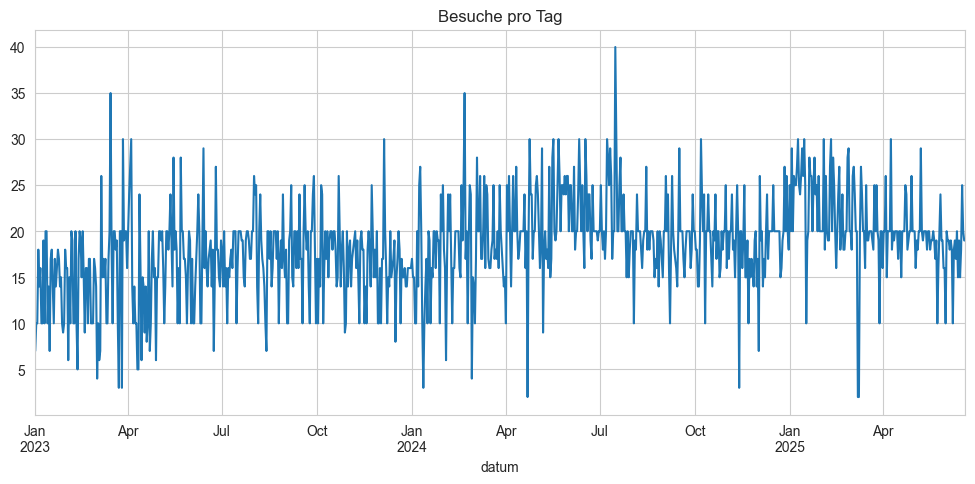

In [15]:
# Wieviele Besuche gab es pro Tag?
df = pd.read_sql('SELECT datum FROM landingpage', engine)
df['datum'] = pd.to_datetime(df['datum'])
df['datum'].value_counts().sort_index().plot(figsize=(12,5), title="Besuche pro Tag")

<Axes: title={'center': 'Geräteverteilung'}>

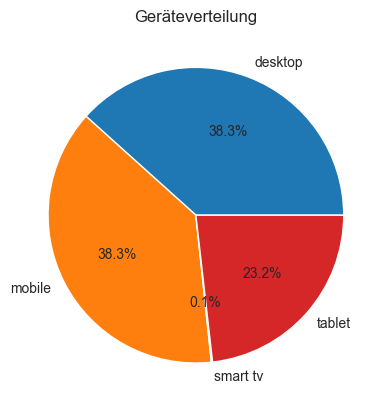

In [25]:
# Geräteverteilung
df = pd.read_sql('SELECT datum, kategorie FROM what_devices_used', engine)
df.groupby('kategorie').size().plot(kind='pie', autopct='%1.1f%%', title="Geräteverteilung")

Silhouette Score: 0.27


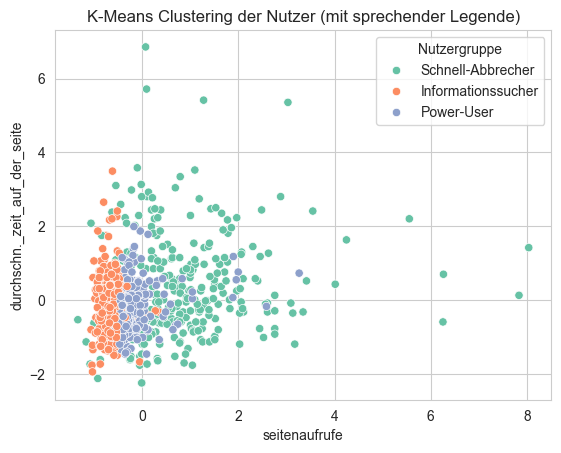

,seitenaufrufe,nutzer_insgesamt,durchschn._zeit_auf_der_seite,absprungrate_in_prozent,seiten_/_sitzung
cluster_label,,,,,
Informationssucher,71.699405,56.425595,94.797619,34.130417,0.907738
Power-User,120.729412,93.811765,92.619608,35.158431,0.984314
Schnell-Abbrecher,216.432343,36.056106,110.181518,6.919340,4.980198


In [30]:
# Daten laden
df = pd.read_sql('SELECT * FROM user_behaviors', engine)

# Zeit in Sekunden umwandeln
df['durchschn._zeit_auf_der_seite'] = pd.to_timedelta(
    df['durchschn._zeit_auf_der_seite'], errors='coerce'
).dt.total_seconds()

# Features fürs Clustering
features = [
    'seitenaufrufe',
    'nutzer_insgesamt',
    'durchschn._zeit_auf_der_seite',
    'absprungrate_in_prozent',
    'seiten_/_sitzung'
]

# Daten bereinigen
df_cluster = df[features].copy()
df_cluster = df_cluster.fillna(0)

# Skalierung
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Finales Clustering (mit 3 Clustern)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Silhouette Score
score = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score: {score:.2f}")

# Cluster-Labels zuweisen
cluster_labels = {
    0: "Informationssucher",
    1: "Power-User",
    2: "Schnell-Abbrecher"
}
df['cluster_label'] = df['cluster'].map(cluster_labels)

# Visualisierung
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 2],
    hue=df['cluster_label'], palette='Set2'
)
plt.xlabel(features[0])
plt.ylabel(features[2])
plt.title("K-Means Clustering der Nutzer (mit sprechender Legende)")
plt.legend(title="Nutzergruppe")
plt.show()

# Clusterstatistik (optional)
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.groupby('cluster_label')[features].mean()

Top 3 Zugriffsquellen insgesamt:
Kategorie
google                         28823
(direct)                        8271
kompetenznetz-einsamkeit.de     1915
Name: Wert, dtype: int64


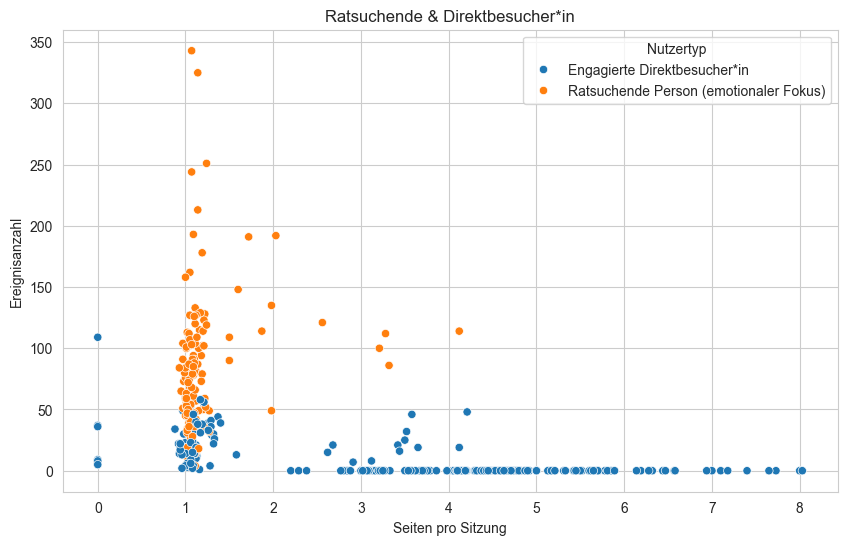

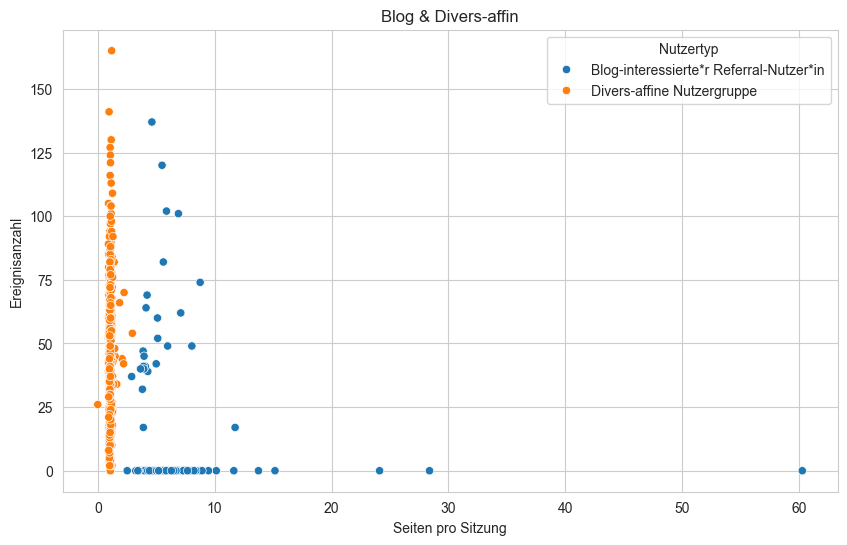


Cluster-Zentren:



,female,male,mobile,desktop,google,(direct),kompetenznetz-einsamkeit.de,Seitenaufrufe,Nutzer Insgesamt,Durchschn. Zeit auf der Seite,Seiten / Sitzung,Aktive Nutzer,Ereignisanzahl
Nutzertyp,,,,,,,,,,,,,
Ratsuchende Person (emotionaler Fokus),17.02,9.72,70.18,62.36,60.39,13.22,2.36,133.83,98.11,97.68,1.21,61.98,86.15
Engagierte Direktbesucher*in,0.93,0.13,48.88,38.56,13.12,6.06,1.46,106.87,29.85,94.03,3.36,7.30,9.95
Blog-interessierte*r Referral-Nutzer*in,3.51,0.76,136.64,154.98,15.83,10.37,2.76,298.19,46.23,120.41,6.40,7.11,9.93
Divers-affine Nutzergruppe,10.49,0.32,48.83,36.89,40.29,9.27,2.21,86.88,70.40,92.97,1.10,34.47,46.97


In [44]:
# CSV-Dateien einlesen
visits = pd.read_csv(r"C:\Users\Admin\Desktop\Redezeit-Analyse\Data\Scrapping data as csv\who_was_visiting_chart.csv")
devices = pd.read_csv(r"C:\Users\Admin\Desktop\Redezeit-Analyse\Data\Scrapping data as csv\what_devices_used_chart.csv")
sources = pd.read_csv(r"C:\Users\Admin\Desktop\Redezeit-Analyse\Data\Scrapping data as csv\where_new_visitors_come_from_chart.csv")
behaviors = pd.read_csv(r"C:\Users\Admin\Desktop\Redezeit-Analyse\Data\Scrapping data as csv\user_behaviors.csv")
events = pd.read_csv(r"C:\Users\Admin\Desktop\Redezeit-Analyse\Data\Scrapping data as csv\what_did_user_do.csv")


# Top-3 Quellen ermitteln
source_counts = sources.groupby('Kategorie')['Wert'].sum().sort_values(ascending=False)
top3_sources = source_counts.head(3)
print("Top 3 Zugriffsquellen insgesamt:")
print(top3_sources)

# Vorverarbeitung
# Aggregation auf Tagesebene, damit sie miteinander verknüpft werden können
visits_agg = visits.pivot_table(index="Datum", columns="Kategorie", values="Wert", aggfunc="sum", fill_value=0).reset_index()
devices_agg = devices.pivot_table(index="Datum", columns="Kategorie", values="Wert", aggfunc="sum", fill_value=0).reset_index()
sources_agg = sources.pivot_table(index="Datum", columns="Kategorie", values="Wert", aggfunc="sum", fill_value=0).reset_index()
events_agg = events.groupby("Datum").agg({"Aktive Nutzer": "sum", "Ereignisanzahl": "sum"}).reset_index()

# Merge aller Tabellen auf Tagesebene
data = visits_agg.merge(devices_agg, on="Datum", how="outer")
data = data.merge(sources_agg, on="Datum", how="outer")
data = data.merge(behaviors, on="Datum", how="outer")
data = data.merge(events_agg, on="Datum", how="outer")

# Fehlende Werte auffüllen
data.fillna(0, inplace=True)

# Zeitspalten umwandeln
behaviors["Durchschn. Zeit auf der Seite"] = pd.to_timedelta(behaviors["Durchschn. Zeit auf der Seite"]).dt.total_seconds()
data["Durchschn. Zeit auf der Seite"] = behaviors["Durchschn. Zeit auf der Seite"]

# Features für Clustering auswählen
features = [
    "female", "male",
    "mobile", "desktop",
    *top3_sources.index.tolist(),  # dynamisch die Top-3 Kategorien nutzen
    "Seitenaufrufe", "Nutzer Insgesamt", "Durchschn. Zeit auf der Seite",
    "Seiten / Sitzung", "Aktive Nutzer", "Ereignisanzahl"
]

# Sicherstellen, dass aus sources_agg die Top3-Spalten vorhanden sind
for col in top3_sources.index:
    if col not in data.columns:
        data[col] = 0

X = data[features].fillna(0)

# Skalieren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Clusternamen zuweisen
cluster_labels = {
    0: "Ratsuchende Person (emotionaler Fokus)",
    1: "Engagierte Direktbesucher*in",
    2: "Blog-interessierte*r Referral-Nutzer*in",
    3: "Divers-affine Nutzergruppe"
}
data['cluster_name'] = data['cluster'].map(cluster_labels)

# Visualisierung: Plot 1 für Cluster 0 und 1
subset_1 = data[data['cluster'].isin([0, 1])]
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=subset_1,
    x="Seiten / Sitzung",
    y="Ereignisanzahl",
    hue="cluster_name",
    palette="tab10"
)
plt.title("Ratsuchende & Direktbesucher*in")
plt.xlabel("Seiten pro Sitzung")
plt.ylabel("Ereignisanzahl")
plt.grid(True)
plt.legend(title="Nutzertyp")
plt.show()

# Visualisierung: Plot 2 für Cluster 2 und 3
subset_2 = data[data['cluster'].isin([2, 3])]
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=subset_2,
    x="Seiten / Sitzung",
    y="Ereignisanzahl",
    hue="cluster_name",
    palette="tab10"
)
plt.title("Blog & Divers-affin")
plt.xlabel("Seiten pro Sitzung")
plt.ylabel("Ereignisanzahl")
plt.grid(True)
plt.legend(title="Nutzertyp")
plt.show()

# Clusterzentren ausgeben
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
cluster_centers["Nutzertyp"] = [cluster_labels[i] for i in range(4)]
print("\nCluster-Zentren:\n")
display(cluster_centers.round(2).set_index("Nutzertyp"))


Lade und aggregiere: user_behaviors
Lade und aggregiere: what_devices_used
Lade und aggregiere: who_was_visiting
Lade und aggregiere: where_new_visitors_come_from
Lade und aggregiere: what_did_user_do
Korrelationsmatrix:


,seitenaufrufe,nutzer_insgesamt,zeit_in_sekunden,absprungrate_in_prozent,seiten_pro_sitzung,mobile,desktop,female,male,new_visitors,aktive_nutzer
seitenaufrufe,1.000000,0.252618,0.227633,-0.274149,0.873965,0.662270,0.928364,0.171107,0.298812,0.266021,0.181620
nutzer_insgesamt,0.252618,1.000000,-0.033050,0.019493,-0.040685,0.399787,0.125626,0.638704,0.502147,0.858001,0.320233
zeit_in_sekunden,0.227633,-0.033050,1.000000,-0.357682,0.198532,0.156093,0.214020,-0.014774,0.038856,0.016187,0.342537
absprungrate_in_prozent,-0.274149,0.019493,-0.357682,1.000000,-0.295970,-0.278048,-0.210975,0.082810,-0.069975,-0.041866,-0.082008
seiten_pro_sitzung,0.873965,-0.040685,0.198532,-0.295970,1.000000,0.503564,0.853094,-0.045039,0.092146,-0.060749,0.041037
mobile,0.662270,0.399787,0.156093,-0.278048,0.503564,1.000000,0.348881,0.381895,0.335212,0.481012,0.219778
desktop,0.928364,0.125626,0.214020,-0.210975,0.853094,0.348881,1.000000,0.025402,0.212832,0.105582,0.119863
female,0.171107,0.638704,-0.014774,0.082810,-0.045039,0.381895,0.025402,1.000000,0.274344,0.664275,0.274070
male,0.298812,0.502147,0.038856,-0.069975,0.092146,0.335212,0.212832,0.274344,1.000000,0.557944,0.285372
new_visitors,0.266021,0.858001,0.016187,-0.041866,-0.060749,0.481012,0.105582,0.664275,0.557944,1.000000,0.329450


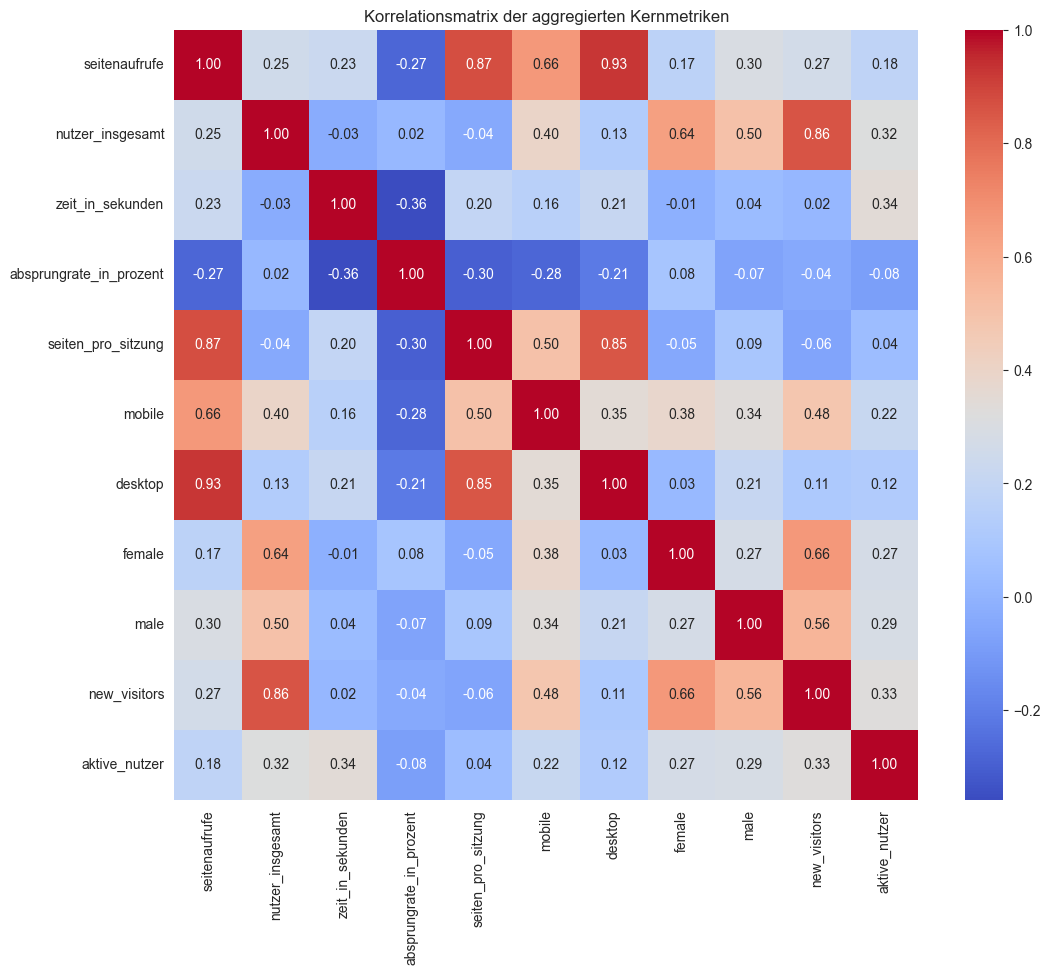

In [8]:
agg_queries = {
    'user_behaviors': """
        SELECT datum,
               SUM(seitenaufrufe) AS seitenaufrufe,
               SUM(nutzer_insgesamt) AS nutzer_insgesamt,
               AVG(zeit_in_sekunden) AS zeit_in_sekunden,
               AVG(absprungrate_in_prozent) AS absprungrate_in_prozent,
               AVG("seiten_/_sitzung") AS seiten_pro_sitzung
        FROM user_behaviors
        GROUP BY datum
        ORDER BY datum
    """,
    # 'where_did_they_come_from': """
    #     SELECT datum,
    #            SUM(sitzungen) AS sitzungen,
    #            SUM(aufrufe) AS aufrufe,
    #            AVG(aufrufe_pro_sitzung) AS aufrufe_pro_sitzung
    #     FROM where_did_they_come_from
    #     GROUP BY datum
    #     ORDER BY datum
    # """,
    'what_devices_used': """
        SELECT datum,
               SUM(CASE WHEN kategorie='mobile' THEN wert ELSE 0 END) AS mobile,
               SUM(CASE WHEN kategorie='desktop' THEN wert ELSE 0 END) AS desktop
        FROM what_devices_used
        GROUP BY datum
        ORDER BY datum
    """,
    'who_was_visiting': """
        SELECT datum,
               SUM(CASE WHEN kategorie='female' THEN wert ELSE 0 END) AS female,
               SUM(CASE WHEN kategorie='male' THEN wert ELSE 0 END) AS male
        FROM who_was_visiting
        GROUP BY datum
        ORDER BY datum
    """,
    'where_new_visitors_come_from': """
        SELECT datum,
               SUM(wert) AS new_visitors
        FROM where_new_visitors_come_from
        GROUP BY datum
        ORDER BY datum
    """,
    'what_did_user_do': """
        SELECT datum,
               SUM(aktive_nutzer) AS aktive_nutzer
        FROM what_did_user_do
        GROUP BY datum
        ORDER BY datum
    """,
    #'landingpage': """
    #    SELECT datum,
    #           SUM(aufrufe) AS landingpage_aufrufe
    #    FROM landingpage
    #    GROUP BY datum
    #    ORDER BY datum
    #"""
}

dfs = []

for table, query in agg_queries.items():
    print(f"Lade und aggregiere: {table}")
    df = pd.read_sql(query, engine)
    df.set_index('datum', inplace=True)
    dfs.append(df)

# Alle auf Datum joinen (inner join: nur gemeinsame Tage)
merged_df = pd.concat(dfs, axis=1, join='inner')

# Korrelationsmatrix
corr = merged_df.corr()

print("Korrelationsmatrix:")
display(corr)


plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix der aggregierten Kernmetriken")
plt.show()

